# Error Analysis And Reduction Techniques

problem statement :

The data contains lists of octamers (8 amino acids) and a flag (-1 or 1) depending on whether HIV-1 protease will cleave in the central position (between amino acids 4 and 5). Build a machine learning model for the dataset, please refer document inside zip file for additional information https://drive.google.com/open?id=1Vm_zruT2djYympL0lG6_l57kAEhF5hxH

In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np

#importing job-lib
import joblib

# importing my custom library file methods
import sys
sys.path.append('/home/admin3/ml_with_phoenix/error_analysis_and_reduction/data_set_and_lib/')
from ipynb.fs.full.my_custom_library import *

#importing scikit learn  library classes
import sklearn.model_selection as model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# reading dataset from different files & storing in pandas dataframe
data_set = pd.read_table('/home/admin3/ml_with_phoenix/error_analysis_and_reduction/data_set_and_lib/746Data.txt', sep=',',names=['octamer','cleaves'])
data_set = data_set.append(pd.read_table('/home/admin3/ml_with_phoenix/error_analysis_and_reduction/data_set_and_lib/1625Data.txt', sep=',',names=['octamer','cleaves']))
data_set = data_set.append(pd.read_table('/home/admin3/ml_with_phoenix/error_analysis_and_reduction/data_set_and_lib/schillingData.txt', sep=',',names=['octamer','cleaves']))
data_set = data_set.append(pd.read_table('/home/admin3/ml_with_phoenix/error_analysis_and_reduction/data_set_and_lib/impensData.txt', sep=',',names=['octamer','cleaves']))
data_set.head()

,octamer,cleaves
0,AAAKFERQ,-1
1,AAAMKRHG,-1
2,AAAMSSAI,-1
3,AAKFERQH,-1
4,AAKFESNF,-1


In [2]:
# data_set(np.where(data_set['cleaves'] == -1))=0
index = np.where(data_set['cleaves']==-1)
data_set.iloc[index[0],1]=0

#### Splitting data set into train and test 

In [4]:
#obtaining x and y values seperated after pre processing through my general method for this data set
x_values,y_values,encoder = pre_processing_hiv(data_set,OneHotEncoder())

In [5]:
#obtaining splitted training and test data set
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(x_values,y_values,test_size=0.2,random_state=0)

#### Training model 

In [6]:
# obtaining classifier object after fitting the train data into it from
# a general method kept in my custom library file
decision_classifier = fit_or_predict(train_X,train_Y,DecisionTreeClassifier(),1)
naive_classifier = fit_or_predict(train_X.todense(),train_Y,GaussianNB(),1)
knn_classifier = fit_or_predict(train_X,train_Y,KNeighborsClassifier(),1)
logistic_classifier = fit_or_predict(train_X,train_Y,LogisticRegression(),1)
svc_classifier = fit_or_predict(train_X,train_Y,SVC(probability = True),1)
forest_classifier = fit_or_predict(train_X,train_Y,RandomForestClassifier(),1)

## predicting outputs  

###### Decisison Classifier

In [7]:
# predicting values of test data set and storing
decision_test_prediction = fit_or_predict(test_X,test_Y,decision_classifier)

# predicting values of train data set and storing
decision_train_prediction = fit_or_predict(train_X,train_Y,decision_classifier)

##### Naive Base Classifier 

In [8]:
# predicting values of test data set and storing
naive_test_prediction = fit_or_predict(test_X.todense(),test_Y,naive_classifier)

# predicting values of train data set and storing
naive_train_prediction = fit_or_predict(train_X.todense(),train_Y,naive_classifier)

##### Knn - Classifier 

In [9]:
# predicting values of test data set and storing
knn_test_prediction = fit_or_predict(test_X,test_Y,knn_classifier)

# predicting values of train data set and storing
knn_train_prediction = fit_or_predict(train_X,train_Y,knn_classifier)

##### Logistic Classifier 

In [10]:
# predicting values of test data set and storing
logistic_test_prediction = fit_or_predict(test_X,test_Y,logistic_classifier)

# predicting values of train data set and storing
logistic_train_prediction = fit_or_predict(train_X,train_Y,logistic_classifier)

##### SVC Classifier

In [11]:
# predicting values of test data set and storing
svc_test_prediction = fit_or_predict(test_X,test_Y,svc_classifier)

# predicting values of train data set and storing
svc_train_prediction = fit_or_predict(train_X,train_Y,svc_classifier)

###### Random Forest Classifier

In [12]:
# predicting values of test data set and storing
forest_test_prediction = fit_or_predict(test_X,test_Y,forest_classifier)

# predicting values of train data set and storing
forest_train_prediction = fit_or_predict(train_X,train_Y,forest_classifier)

## Error Analysis And Reduction Techniques

##### Confusion Matrix

In [13]:
print("Confusion Matrix Of Decision Tree Classifier")
print(confusion_matrix(decision_test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Confusion Matrix Of Naive Base Classifier")
print(confusion_matrix(naive_test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Confusion Matrix Of K-Nearest Neighbour Classifier")
print(confusion_matrix(knn_test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Confusion Matrix Of Support Vector Classifier")
print(confusion_matrix(svc_test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Confusion Matrix Of Logistic Regression Classifier")
print(confusion_matrix(logistic_test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Confusion Matrix Of Random Forest Classifier")
print(confusion_matrix(forest_test_prediction,test_Y))

Confusion Matrix Of Decision Tree Classifier
[[945  63]
 [ 98 212]]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Confusion Matrix Of Naive Base Classifier
[[842  14]
 [201 261]]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Confusion Matrix Of K-Nearest Neighbour Classifier
[[974  86]
 [ 69 189]]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Confusion Matrix Of Support Vector Classifier
[[1023   52]
 [  20  223]]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Confusion Matrix Of Logistic Regression Classifier
[[1016   47]
 [  27  228]]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Confusion Matrix Of Random Forest Classifier
[[1032   87]
 [  11  188]]


##### Accuracy Score 

In [14]:
print("Accuracy Score Of Decision Tree Classifier")
print(accuracy_score(decision_test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Accuracy Score Of Naive Base Classifier")
print(accuracy_score(naive_test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Accuracy Score Of K-Nearest Neighbour Classifier")
print(accuracy_score(knn_test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Accuracy Score Of Support Vector Classifier")
print(accuracy_score(svc_test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Accuracy Score Of Logistic Regression Classifier")
print(accuracy_score(logistic_test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Accuracy Score Of Random Forest Classifier")
print(accuracy_score(forest_test_prediction,test_Y))

Accuracy Score Of Decision Tree Classifier
0.877845220030349
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy Score Of Naive Base Classifier
0.8368740515933232
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy Score Of K-Nearest Neighbour Classifier
0.8823975720789075
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy Score Of Support Vector Classifier
0.9453717754172989
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy Score Of Logistic Regression Classifier
0.9438543247344461
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Accuracy Score Of Random Forest Classifier
0.9256449165402124


##### Classification Report 

In [15]:
print("Classification Report Of Decision Tree Classifier")
print(classification_report(decision_test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Classification Report Of Naive Base Classifier")
print(classification_report(naive_test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Classification Report Of K-Nearest Neighbour Classifier")
print(classification_report(knn_test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Classification Report Of Support Vector Classifier")
print(classification_report(svc_test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Classification Report Of Logistic Regression Classifier")
print(classification_report(logistic_test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Classification Report Of Random Forest Classifier")
print(classification_report(forest_test_prediction,test_Y))

Classification Report Of Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1008
           1       0.77      0.68      0.72       310

    accuracy                           0.88      1318
   macro avg       0.84      0.81      0.82      1318
weighted avg       0.87      0.88      0.88      1318

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Classification Report Of Naive Base Classifier
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       856
           1       0.95      0.56      0.71       462

    accuracy                           0.84      1318
   macro avg       0.88      0.77      0.80      1318
weighted avg       0.86      0.84      0.82      1318

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Classification Report Of K-Nearest Ne

#### CAP Curves Of all models 

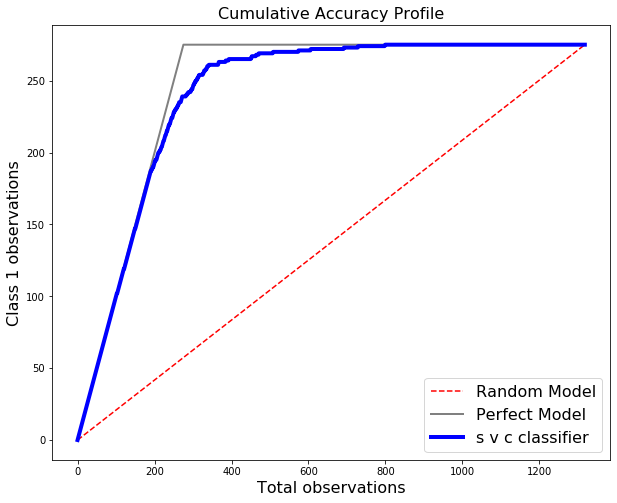

In [16]:
label="s v c classifier"
plot_cap(test_X,test_Y,label,svc_classifier)

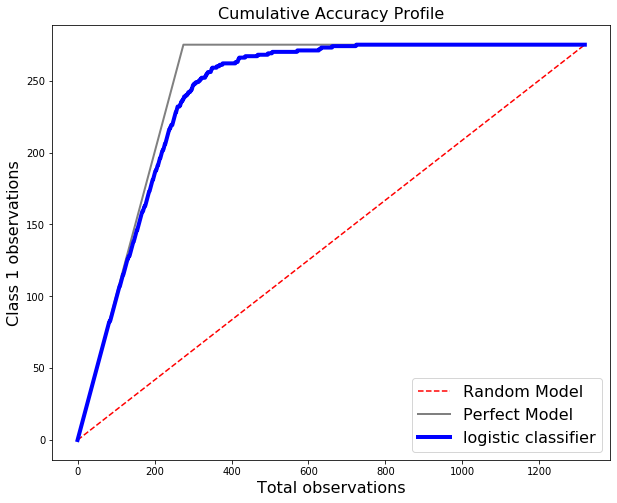

In [17]:
label="logistic classifier"
plot_cap(test_X,test_Y,label,logistic_classifier)

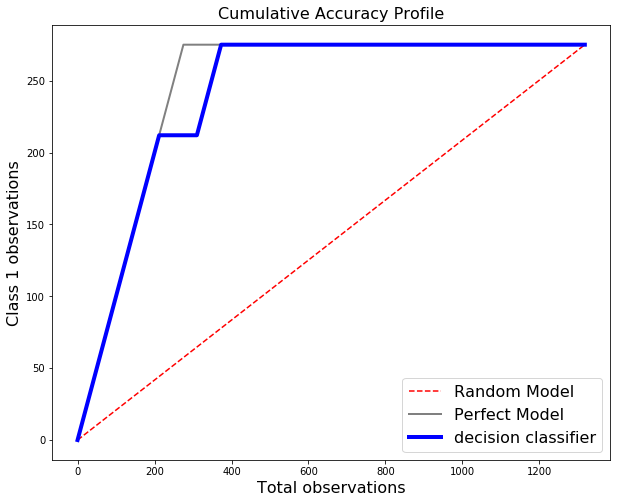

In [18]:
label="decision classifier"
plot_cap(test_X,test_Y,label,decision_classifier)

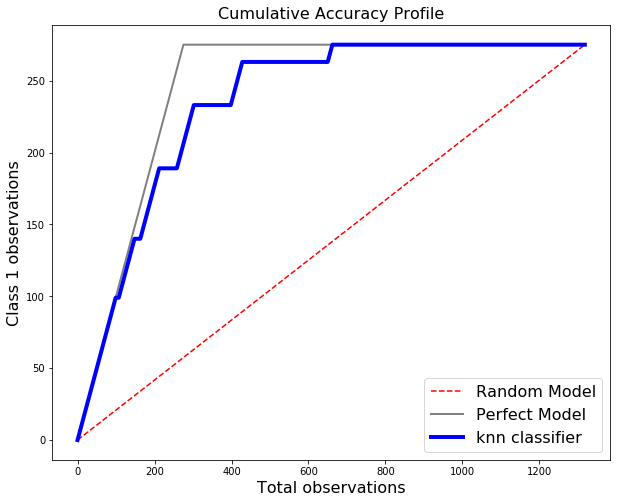

In [19]:
label="knn classifier"
plot_cap(test_X,test_Y,label,knn_classifier)

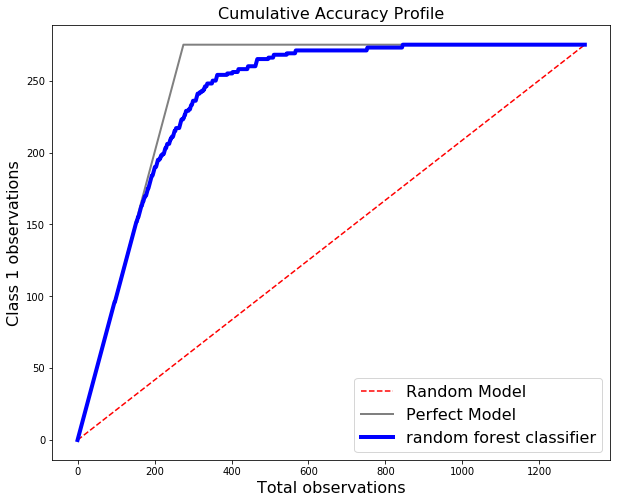

In [20]:
label="random forest classifier"
plot_cap(test_X,test_Y,label,forest_classifier)

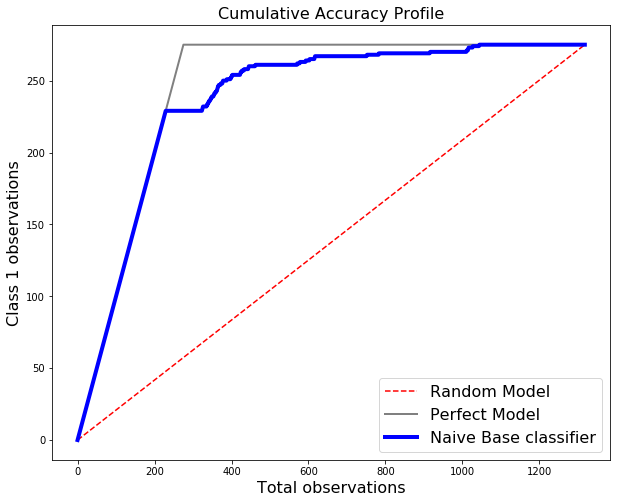

In [22]:
label="Naive Base classifier"
plot_cap(test_X.todense(),test_Y,label,naive_classifier)